# STA410 Week 10 Programming Assignment (10 points)

Welcome.

## Rules


0. **This is a paired or individual assignment.** Specific code solutions submitted for these assignments must be created either individually or in the context of a paired effort: ***group efforts of three or more are students are not allowed.*** Please seek homework partners in-person or on the course discussion board on piazza. **Paired students each separately submit their (common) work, including (agreeing) contribution of work statements for each problem.**
  
   > Students choosing to work individually must work in accordance with the [University Student Academic Integrity values](https://www.artsci.utoronto.ca/current/academic-advising-and-support/student-academic-integrity)  of "honesty, trust, fairness, respect, responsibility and courage." Students working in pairs may share work without restriction within their pair, but must otherwise work in accordance with the [University Student Academic Integrity values](https://www.artsci.utoronto.ca/current/academic-advising-and-support/student-academic-integrity) noted above. ***Getting and sharing "hints" from other classmates is allowed; but, the eventual code creation work and submission must be your own individual or paired creation.***
   
   
1. **Do not delete or replace cells**: this erases `cell ids` upon which automated code tests are based.

    - ***If you accidentally delete a required cell*** try "Edit > Undo Delete Cells" in the notebook editor; otherwise, redownload the notebook (so it has the correct required `cells ids`) and repopulate it with your answers (assuming you don't overwrite them when you redownload the notebook).

   - ***You may add cells for scratch work*** but if required answers are not submitted through the provided cells where the answers are requested your answers may not be marked.

  > You may check if `cell ids` are present and working by running the following command in a cell 
  >
  > `! grep '"id":' <path/to/notebook>.ipynb`
  >
  > and making sure the `cell ids` **do not change** when you save your notebook.
  >
  >> ***If you are working in any environment other than*** [UofT JupyterLab](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master&urlpath=/lab/tree/sta410hw0), [UofT JupyterHub](https://jupyter.utoronto.ca/hub/user-redirect/git-pull?repo=https://github.com/pointOfive/sta410hw0&branch=master), or [Google Colab](https://colab.research.google.com/github/pointOfive/sta410hw0/blob/master/sta410hw0.ipynb), your system must meet the following versioning requirements 
   >>
   >>   - [notebook format >=4.5](https://github.com/jupyterlab/jupyterlab/issues/9729) 
   >>   - jupyter [notebook](https://jupyter.org/install#jupyter-notebook) version [>=6.2](https://jupyter-notebook.readthedocs.io/en/stable/) for "classic" notebooks served by [jupyterhub](https://jupyterhub.readthedocs.io/en/stable/quickstart.html)
   >>   - [jupyterlab](https://jupyter.org/install) version [>=3.0.13](https://github.com/jupyterlab/jupyterlab/releases/tag/v3.0.13) for "jupyterlab" notebooks  
   >>    
   >> otherwise `cell ids` will not be supported and you will not get any credit for your submitted homework.  
      
2. **No cells may have any runtime errors** because this causes subsequent automated code tests to fail and you will not get marks for tests which fail because of previous runtime errors. 

  - Run time errors include, e.g., unassigned variables, mismatched parentheses, and any code which does not work when the notebook cells are sequentially run, even if it was provided for you as part of the starter code. ***It is best to restart and re-run the cells in your notebook to ensure there are no runtime errors before submitting your work.***
    
  - The `try`-`except` block syntax catches runtime errors and transforms them into `exceptions` which will not cause subsequent automated code tests to fail.  


3. **No jupyter shortcut commands** such as `! python script.py 10` or `%%timeit` may be included in the final submission as they will cause subsequent automated code tests to fail.

  - ***Comment out ALL jupyter shortcut commands***, e.g., `# ! python script.py 10` or `# %%timeit` in submitted notebooks.


4. **Python library imports are limited** to only libraries imported in the starter code and the [standard python modules](https://docs.python.org/3/py-modindex.html). Importing additional libraries will cause subsequent automated code tests to fail.

  > Unless a problem instructs differently, you may use any functions available from the libraries imported in the starter code; otherwise, you are expected to create your own Python functionality based on the Python stdlib (standard libary, i.e., base Python and standard Python modules).


5. You are welcome and encouraged to adapt code you find available online into your notebook; however, if you do so you must provide a link to the utilized resource. ***If failure to cite such references is identified and confirmed, your mark will be immediately reduced to 0.***  

In [ ]:
# Unless a problem instructs differently, you may use any functions available from the following library imports
import numpy as np
from scipy import stats
import sklearn
import statsmodels.api as sm
from scipy.special import expit as invlogit
import matplotlib.pyplot as plt

# Problem 0 (required)

Are you working with a partner to complete this assignment?  
- If not, assign  the value of `None` into the variable `Partner`.
- If so, assign the name of the person you worked with into the variable `Partner`.
    - Format the name as `"<First Name> <Last Name>"` as a `str` type, e.g., "Scott Schwartz".

In [ ]:
# Required: only worth points when not completed, in which case, you'll lose points
Partner = None
# This cell will produce a runtime error until you assign a value to this variable

What was your contribution in completing the code for this assignments problems? Assign one of the following into each of the `Problem_X` variables below.

- `"I worked alone"`
- `"I contributed more than my partner"`
- `"My partner and I contributed equally"`
- `"I contributed less than my partner"`
- `"I did not contribute"`

In [ ]:
# Required: only worth points when not completed, in which case, you'll lose points
Problem_1 = "I worked alone"
Problem_2 = "I worked alone"
# This cell will produce a runtime error until you assign a value to this variable

# Problem 1 (5 points)

Define the function `logistic_regression_IRLS(X, y, beta0, k)` which returns $\beta^{(k)}$ of the ***iteratively reweighted least squares*** (IRLS) fit 

1. $\tilde y^{(t)} = \underline{X\beta^{(t)}}+ \overset{(t)}{W}{}^{-1}(y- \overset{(t)}{E[y]})$
    - $\overset{(t)}{E[y_i]}= \frac{1}{1+\exp(-z_i\beta^{(t)})}$
    - $\overset{(t)}{W_{ij}} = 0 \text{ for } i\not=j \text{ and } \overset{(t)}{W_{ii}} = \overset{(t)}{E[y_i]} \left(1-\overset{(t)}{E[y_i]} \right)$


2. $\beta^{(t+1)} = \left(X^T \overset{(t)}{W}X\right)^{-1} X^T\overset{(t)}{W} \tilde y^{(t)} \quad \underset{\text{solved as}}{\overset{\text{efficiently}}{\Longrightarrow}} \quad \left(X^T \overset{(t)}{W}X\right)\beta^{(t+1)} = X^T\overset{(t)}{W} \tilde y^{(t)}$


of the logistic regression model
   
$\quad\quad\quad\displaystyle \Pr(y_i=1) = \frac{1}{1+\exp(-z_i\beta)}$

However, rather than using the IRLS form exactly, instead use the standard form of ***Newton's method*** where the $\beta^{(t+1)}$ update above is instead reformulated as 

\begin{align*}
\beta^{(t+1)} & = {} \underline{\beta^{(t)}} + \left(X^T \overset{(t)}{W}X\right)^{-1} X^T\overset{(t)}{W} (\tilde y^{(t)}-\underline{X\beta^{(t)}})\\
& = {} \underline{\beta^{(t)}} + \underbrace{\left(X^T \overset{(t)}{W}X\right)^{-1} X^T (y- \overset{(t)}{E[y]}) }_{\text{use } \texttt{np.linalg.solve} \textbf{ not } \text{matrix inversion}}
\end{align*}

The reasons for using the ***Newton's method*** version instead of the ***IRLS*** version of the update is that it avoids multiplying by the $\overset{(t)}{W}$ matrix twice and to make the value of the next iteration $\beta^{(t+1)}$ an addiive offset adjustment to the value of the previous iteration $\beta^{(t)}$, which is often more numerically accurate than recreating the target value as a fresh computation.

*This problem is inspired by Subsection 2.2.1.1 **Iteratively Reweighted Least Squares** of Section 2.2.1 **Newton's Method and Fisher Scoring** in Chapter 2.2 **Multivariate Problems** of the Givens and Hoeting **Computational Statistics** textbook (pages 34-38).*

In [ ]:
from scipy.special import expit as invlogit
def logistic_regression_IRLS(X, y, beta0, k):
    '''
    Computes IRLS estimation of logistic regression
    
    X    : (np.array) n by p design matrix
    Y    : (np.array) n binary outcomes
    beta0: (np.array) p coefficients
    k    : (int)      number of IRLS to beta0
    
    returns: (np.array) beta coefficients after k IRLS updates to beta0
    '''

    beta_t = np.zeros((k,X.shape[1]))
    beta_t[0,:] = beta0
    
    for i in range(1,k):
      # Compute expected values E[y] for each data point
        z = X @ beta_t[i - 1, :]
        E_y = invlogit(z)

        # Compute the W matrix diagonals
        W = np.diag(E_y * (1 - E_y))

        # Update beta values using Newton's method
        beta_t[i, :] = beta_t[i - 1, :] + np.linalg.solve(X.T @ W @ X, X.T @ (y - E_y))
        
    return beta_t[-1,:]

In [ ]:
# Cell for scratch work

# You are welcome to add as many new cells into this notebook as you would like.
# Just do not leave in a state that will produce a runtime errors when notebook cells are run sequentially.

# Any cells included for scratch work that are no longer needed may be deleted so long as 
# - all the required functions are still defined and available when called
# - no cells requiring variable assignments are deleted.

# None of this will not cause problems with `cell ids` assuming your versioning supports `cell ids`
# (as UofT JupyterHub, UofT JupyterLab, an Google Colab will).
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 1, 1, 1])
beta0 = np.zeros(X.shape[1])
print(beta0)
k = 10

beta = logistic_regression_IRLS(X, y, beta0, k)
print("Beta values after k iterations:", beta)

[0. 0.]
Beta values after k iterations: [ 53.94596398 -38.55723935]


In [ ]:
# Cell for scratch work


## Hints

- This algorithm is specified in the course notes and is also discussed in Keith Knight's STA410 [notes13.pdf document](https://q.utoronto.ca/courses/296804/files?preview=25407719) and [logistic.pdf document](https://q.utoronto.ca/courses/296804/files?preview=25407763).
- For `W.shape = (n,1)` the `X.T.np.diag(W)` computation is the same as `(X*W).T` based on `numpy` broadcasting
- Your algorithm can be checked against

    - `statsmodels`
    
        ```python
        # https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/
        import statsmodels.api as sm
        log_reg = sm.Logit(y[:,np.newaxis], X).fit()
        log_reg.summary()
        ```

    - `scikit-learn`
    
        ```python
        # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
        # https://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels
        from sklearn.linear_model import LogisticRegression
        logreg = LogisticRegression(penalty='none', fit_intercept=False)
        logreg.fit(X, y)
        logreg.coef_
        ```

## Problem 1 Questions 0-1 (2.5 points)

Your function will be tested against

```python 
from scipy.special import expit as invlogit
np.random.seed(seed)
X = np.random.normal(mu, sd, (n,p))
X[:,0] = 1
beta_mean,beta_sd = 0,1
beta = np.random.normal(beta_mean, beta_sd, p)
y = (np.random.uniform(size=n)<invlogit(X.dot(beta))).astype(int)
```

- You do not need to make any variable assignments: your function will be called based on the parameterization specified in the problem prompt.

## Problem 1 Questions 2-6 (2.5 points)

2. (0.5 points) Which of the following most directly indicates that the updated iteration is the solution to a ***weighted least squares linear regression*** problem? 

    - (A) $\tilde y^{(t)} = \underline{X\beta^{(t)}}+ \overset{(t)}{W}{}^{-1}(y- \overset{(t)}{E[y]})$
    - (B) $\beta^{(t+1)} = \left(X^T \overset{(t)}{W}X\right)^{-1} X^T\overset{(t)}{W} \tilde y^{(t)}$
    - (C) $\beta^{(t+1)} = \underline{\beta^{(t)}} + \left(X^T \overset{(t)}{W}X\right)^{-1} X^T\overset{(t)}{W} (\tilde y^{(t)}-\underline{X\beta^{(t)}})$
    - (D) $\beta^{(t+1)} = \beta^{(t)} + \left(X^T \overset{(t)}{W}X\right)^{-1} X^T (y- \overset{(t)}{E[y]})$


3. (0.5 points) Which of the following is the ***Hessian*** of the ***logistic regression likelihood***?

    - (A) $\overset{(t)}{W}{}^{-1}$
    - (B) $X^T\overset{(t)}{W}$
    - (C) $X^T \overset{(t)}{W}X$
    - (D) $\left(X^T \overset{(t)}{W}X\right)^{-1}$ 


4. (0.5 points) Which of the following is the ***gradient*** of the ***logistic regression likelihood***?

    - (A) $(y- \overset{(t)}{E[y]})$
    - (B) $\overset{(t)}{W}{}^{-1}(y- \overset{(t)}{E[y]})$
    - (C) $X^T (y- \overset{(t)}{E[y]})$
    - (D) $X^T (\tilde y^{(t)}-X\beta^{(t)})$

    
5. (0.5 points) Which of the following is the most directly efficient computation of ***Newton's method***?

    - (A) $\tilde y^{(t)} = \underline{X\beta^{(t)}}+ \overset{(t)}{W}{}^{-1}(y- \overset{(t)}{E[y]})$
    - (B) $\beta^{(t+1)} = \left(X^T \overset{(t)}{W}X\right)^{-1} X^T\overset{(t)}{W} \tilde y^{(t)}$
    - (C) $\beta^{(t+1)} = \underline{\beta^{(t)}} + \left(X^T \overset{(t)}{W}X\right)^{-1} X^T\overset{(t)}{W} (\tilde y^{(t)}-\underline{X\beta^{(t)}})$
    - (D) $\beta^{(t+1)} = \beta^{(t)} + \left(X^T \overset{(t)}{W}X\right)^{-1} X^T (y- \overset{(t)}{E[y]})$
    

6. (0.5 points) What is the fundamental technical difference between ***Newton's method*** and ***Fisher scoring***? 

    - (A) They produce numerically different answers
    - (B) Potential differences between the negative ***Hessian*** and ***Fisher information***
    - (C) ***Newton's method*** solves IRLS through iterative update while ***Fisher scoring*** solves it as a ***weighted least squares regression problem***
    - (D) Nothing since they are equivalent as demonstrated here

    

In [ ]:
# 0.5 points each [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p1q2 = "B" 
p1q3 = "C" 
p1q4 = "C" 
p1q5 = "D" 
p1q6 = "B" 
# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p1q2`-`p1q6` variables are assigned values

# Problem 2 (5 points)

Provide a model fit that is robust against outliers by defining the function `huber_SLR(x, y, c, K=10, eps=1e-7)` (for simple linear regression) which implements ***M estimation*** for ***Huber loss*** with the ***IRLS*** algorithm where the weight of a data point is $1$ if $|\psi_c(y_i-x_i^t\beta^{(t)})| \leq c$ and $0$ otherwise, where  

$$\psi_c(t) = \left\{\begin{array}{ll}c&t>c\\t & |t| \leq c\\-c&t<-c\end{array}\right.$$


***Hints:*** 

- Your `huber_SLR` function will be tested directly using data simiar to the example below.
- Use the `OLS` function rather than the `WLS` function by subsetting the data to only the points with weight $1$.
- This algorithm is specified in the course notes as well as in Keith Knight's STA410 [notes14.pdf document](https://q.utoronto.ca/courses/296804/files?preview=25407629).

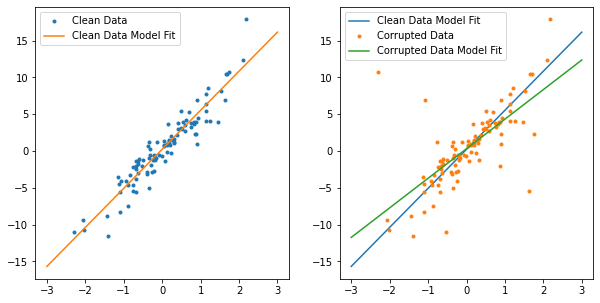

In [ ]:
n = 100
np.random.seed(1)
x = stats.norm.rvs(size=n)
y = 5*x + (1+np.abs(x))*stats.norm().rvs(size=n) 
fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(x,y,'.', label="Clean Data")

# https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html
X = sm.add_constant(x)
model = sm.OLS(y,X)
fit = model.fit()
support = np.linspace(-3,3,20)
ax[0].plot(support,fit.predict(sm.add_constant(support)),
           label="Clean Data Model Fit")
ax[0].legend()

n_corrupted = 10
np.random.shuffle(x[:n_corrupted])
ax[1].plot(support,fit.predict(sm.add_constant(support)),
           label="Clean Data Model Fit")
ax[1].plot(x,y,'.', label="Corrupted Data")
X = sm.add_constant(x)
model = sm.OLS(y,X)
fit = model.fit()
support = np.linspace(-3,3,20)
ax[1].plot(support,fit.predict(sm.add_constant(support)),
           label="Corrupted Data Model Fit")
ax[1].legend()

In [ ]:
def huber_SLR(x, y, c, K=10, eps=1e-7):
    '''
        Fits a simple linear regression y=ax+b using 
        huber loss with arbitrary tuning parameter c
        
        x:   (np.array)  independent variable
        y:   (np.array)  dependent variable
        c:   (float)     |y_i-yhat_i|>c makes w_i=0; otherwise, w_i=1
        K:   (int)       maximum IRLS steps
        eps: (float)     stopping criterion returns IRLS fit at step k
                         if ||(a_k,b_k)-(a_{k-1},b_{k-1})||_2^2 < eps
                         
        returns IRLS fit (statsmodels OLS) object
                after K steps of when eps stopping criterion is met
    '''

    X = sm.add_constant(x)
    model = sm.OLS(y,X)
    fit = model.fit()
    params = fit.params
    
    # Complete the K-step Huber loss IRLS algorithm updating `fit`
    # incorporating an eps-based easly stopping criterion
    for _ in range(K):
        residuals = y - np.dot(X, params)
        weights = np.array([1 if abs(res) <= c else 0 for res in residuals])
        
        X_subset = X[weights == 1]
        y_subset = y[weights == 1]

        model_subset = sm.OLS(y_subset, X_subset)
        fit_new = model_subset.fit()
        params_new = fit_new.params

        if np.linalg.norm(params_new - params) < eps:
            break

        params = params_new
        fit = fit_new

    return fit

huber_fit = huber_SLR(x,y,c=2,K=10)
ax[1].plot(support,huber_fit.predict(sm.add_constant(support)),
           label="Huber Loss Corrupted Data Model Fit")
ax[1].legend()

## Problem 2 question 0-2 (2 points)

0-2. Your `huber_SLR` will be tested on the data above for various choices of `c`, `K`, and `eps`.

- You do not need to assign any variables for this problem -- your `huber_SLR` function will be called directly.

## Problem 2 question 3 (1 point)

3. Which of the following is the smallest integer value for $c$ which first makes the simple linear regression fit of the `huber_SLR` extremely similar to the "Clean Data Model Fit" for the data ?

    1. 1
    2. 2
    3. 3
    4. 4

***Hint:*** if you replace `ax[1].legend()` with 

```python
huber_fit = huber_SLR(x,y,c=2,K=10)
ax[1].plot(support,huber_fit.predict(sm.add_constant(support)),
           label="Huber Loss Corrupted Data Model Fit")
ax[1].legend()
```

in the plotting demonstration code above you can see the simple linear regression line fit with the ***Huber loss*** function. 

In [ ]:
# 1.0 point [format: `str` either "A" or "B" or "C" or "D" based on the choices above]
p2q3 = "C"
# Uncomment the above and keep each only either "A" or "B" or "C" or "D"

# This cell will produce a runtime error until the `p2q3` variable is assigned a value

## Problem 2 question 4-6 (1 point)

4-6. Define a new function `huber_MLR` which generalizes the simpler linear regression function `huber_SLR` to accept a multivariate design matrix `X` rather than a vector `x`. When defining `huber_MLR` follow the specifications given in the starter code below.

- You do not need to assign any variables for this problem -- your `huber_MLR` function will be tested directly for some design matrix `X` and various choices of `c`, `K`, and `eps`.

In [ ]:
def huber_MLR(x, y, c, K=10, eps=1e-7):
    '''
        Fits a multivariate linear regression y = X beta using 
        huber loss with arbitrary tuning parameter c
        
        X(n,p): (np.array)  design matrix (intercept will not be added)
        y(n,):  (np.array)  dependent variable
        c:      (float)     |y_i-yhat_i|>c makes w_i=0; otherwise, w_i=1
        K:      (int)       maximum IRLS steps (default K=10)
        eps:    (float)     stopping criterion returns IRLS fit at step k
                            if ||(a_k,b_k)-(a_{k-1},b_{k-1})||_2^2 < eps (default eps=1e-7)
                         
        returns IRLS fit (statsmodels OLS) object
                after K steps of when eps stopping criterion is met
    '''

    # Complete the K-step Huber loss IRLS algorithm updating `fit`
    # incorporating an eps-based easly stopping criterion
    
    model = sm.OLS(y,X); fit = model.fit()
    params = fit.params
    for _ in range(K):
      residuals = y - np.dot(X, params)
      weights = np.array([1 if abs(res) <= c else 0 for res in residuals])
        
      X_subset = X[weights == 1]
      y_subset = y[weights == 1]

      model_subset = sm.OLS(y_subset, X_subset)
      fit_new = model_subset.fit()
      params_new = fit_new.params

      if np.linalg.norm(params_new - params) < eps:
        break

      params = params_new
      fit = fit_new
    return fit

## Problem 2 questions 7-8 (1 point)

7. What is true about the ***M estimation*** for ***Huber loss*** in problem 2 and logistic regression model fitting in problem 1?

    1. They both substitue ***Fisher information*** for the expected value of the ***Hessian***
    2. Problem 2 specifies a minimization problem while problem 1 specifies a maximization problem
    3. Problem 1 is implemented using an ***IRLS*** algorithm while ***M estimation*** for ***Huber loss*** in problem 2 is not
    4. All of the above


8. For ***Huber loss*** fit with ***M estimation*** as above, which of the following is the same as $E[X^TWX]$, where 

   $$W_{ii}=\left\{\begin{array}{ll} 1 & |y_i-x_i^T\beta|\leq c\\0&\text{otherwise} \end{array}\right. \quad \text{ and } \quad W_{ij}=0 \text{ for } i\neq j$$ 

   and $c$ is the ***Huber loss*** function parameter and $y_i$ is assumed to be independently and identically distributed for all $i$?

    1. $\Pr(|y_i-x_i^T\beta|\leq c)X^TX$ 
    2. ***expected Fisher Information***
    3. ***observed Fisher Information***
    4. The inverse of the negative ***Hessian*** matrix
    5. All of the above

In [ ]:
# 0.5 points each [format: `str` either "A" or "B" or "C" or "D" or "E" based on the choices above]
p2q7 = "B"
p2q8 = "A"
# Uncomment the above and keep each only either "A" or "B" or "C" or "D" or "E"

# This cell will produce a runtime error until the `p2q7` and `p2q8` variables are assigned values